## Observations and Insights 

In [4]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as rand
from scipy.stats import linregress
from colorama import Fore, Back, Style 

In [5]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Main_data_df=pd.merge(mouse_metadata,study_results,on = 'Mouse ID' , how ="outer")
# Display the data table for preview

Main_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
print(f"\nThe number of unique mice participating in these treatmets is : {Fore.RED}{len(Main_data_df['Mouse ID'].unique())} Mice\n")


The number of unique mice participating in these treatmets is : 249 Mice



In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Sorting Data on "Mouse ID", "Timepoint"
Sorted_data=Main_data_df.sort_values(["Mouse ID", "Timepoint"])
Sorted_data=Sorted_data.reset_index(drop=True)
#Finding the Duplicated Mice data
duplicated_mice=Sorted_data[Sorted_data.duplicated(["Mouse ID", "Timepoint"],keep=False)]
#Finding the Duplicated Mice IDs
duplicated_mice_ID=duplicated_mice.groupby(['Mouse ID'])['Mouse ID'].max()
duplicated_ID=duplicated_mice_ID.values.tolist()
#Printing the List of Duplicated Mice IDs
print(f"\nThere is/are {len(duplicated_ID)} duplicate mouse/mice in these treatmets :{Fore.RED}")
print(duplicated_ID)
print("\n")


There is/are 1 duplicate mouse/mice in these treatmets :
['g989']




In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

print(f"\n{Fore.GREEN}The duplicate mouse/mice data in these treatmets :{Fore.RED}")
#just printing usefull information fitting on the screen
print(duplicated_mice.loc[:,['Mouse ID','Drug Regimen','Tumor Volume (mm3)','Age_months','Timepoint']])



The duplicate mouse/mice data in these treatmets :
    Mouse ID Drug Regimen  Tumor Volume (mm3)  Age_months  Timepoint
586     g989     Propriva           45.000000          21          0
587     g989     Propriva           45.000000          21          0
588     g989     Propriva           48.786801          21          5
589     g989     Propriva           47.570392          21          5
590     g989     Propriva           51.745156          21         10
591     g989     Propriva           49.880528          21         10
592     g989     Propriva           51.325852          21         15
593     g989     Propriva           53.442020          21         15
594     g989     Propriva           55.326122          21         20
595     g989     Propriva           54.657650          21         20


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaning the joined Data by removing the duplicated mice
Clean_main_data=Main_data_df.loc[~(Main_data_df["Mouse ID"].isin(duplicated_ID) )]
Clean_main_data=Clean_main_data.reset_index(drop=True)

#cleaning the Mice metadata by removing the duplicated mice
Clean_mouse_metadata = mouse_metadata.loc[~(mouse_metadata["Mouse ID"].isin(duplicated_ID) )]
mouse_metadata=mouse_metadata.reset_index(drop=True)

#cleaning the Study_results data by removing the duplicated mice
study_results =study_results.loc[~(study_results["Mouse ID"].isin(duplicated_ID) )]
study_results=study_results.reset_index(drop=True)


Clean_main_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
print(f"\nThe number of unique mouse is after removing the Duplicated info:  {Fore.RED}{len(Clean_main_data['Mouse ID'].unique())}")


The number of unique mouse is after removing the Duplicated info:  248


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Calculatig mean of the tumor volume for each regimen
Summery_report_mean=pd.DataFrame(Clean_main_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean().round(2))
Summery_report_mean=Summery_report_mean.rename(columns={"Tumor Volume (mm3)":"Mean "})

#Calculatig median of the tumor volume for each regimen
Summery_report_median=pd.DataFrame(Clean_main_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median().round(2))
Summery_report_median=Summery_report_median.rename(columns={"Tumor Volume (mm3)":"Median"})

#Calculatig variance of the tumor volume for each regimen
Summery_report_var=pd.DataFrame(Clean_main_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var().round(2))
Summery_report_var=Summery_report_var.rename(columns={"Tumor Volume (mm3)":"Variance"})

#Calculatig standard deviation of the tumor volume for each regimen
Summery_report_std=pd.DataFrame(Clean_main_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std().round(2))
Summery_report_std=Summery_report_std.rename(columns={"Tumor Volume (mm3)":"STD"})

#Calculatig SEM of the tumor volume for each regimen
Summery_report_sem=pd.DataFrame(Clean_main_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem().round(2))
Summery_report_sem=Summery_report_sem.rename(columns={"Tumor Volume (mm3)":"SEM"})

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Summery_report=Summery_report_mean.merge(Summery_report_median.merge(Summery_report_var.merge(Summery_report_std.merge(Summery_report_sem,on='Drug Regimen'),on='Drug Regimen'),on='Drug Regimen'),on='Drug Regimen')
print (f"\n              {Fore.RED}Summary Statistics{Style.RESET_ALL}")
print(Summery_report)


              Summary Statistics
              Mean   Median  Variance   STD   SEM
Drug Regimen                                     
Capomulin     40.68   41.56     24.95  4.99  0.33
Ceftamin      52.59   51.78     39.29  6.27  0.47
Infubinol     52.88   51.82     43.13  6.57  0.49
Ketapril      55.24   53.70     68.55  8.28  0.60
Naftisol      54.33   52.51     66.17  8.13  0.60
Placebo       54.03   52.29     61.17  7.82  0.58
Propriva      52.32   50.45     43.85  6.62  0.54
Ramicane      40.22   40.67     23.49  4.85  0.32
Stelasyn      54.23   52.43     59.45  7.71  0.57
Zoniferol     53.24   51.82     48.53  6.97  0.52


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# using agg function to calculate mean, median, variance, standard deviation, and SEM in a single groupby
Summery_report2=Clean_main_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}).reset_index().round(2)
print (f"\n              {Fore.RED}Summary Statistics{Style.RESET_ALL}")
print(Summery_report2)


              Summary Statistics
  Drug Regimen Tumor Volume (mm3)                          
                             mean median    var   std   sem
0    Capomulin              40.68  41.56  24.95  4.99  0.33
1     Ceftamin              52.59  51.78  39.29  6.27  0.47
2    Infubinol              52.88  51.82  43.13  6.57  0.49
3     Ketapril              55.24  53.70  68.55  8.28  0.60
4     Naftisol              54.33  52.51  66.17  8.13  0.60
5      Placebo              54.03  52.29  61.17  7.82  0.58
6     Propriva              52.32  50.45  43.85  6.62  0.54
7     Ramicane              40.22  40.67  23.49  4.85  0.32
8     Stelasyn              54.23  52.43  59.45  7.71  0.57
9    Zoniferol              53.24  51.82  48.53  6.97  0.52


## Bar and Pie Charts

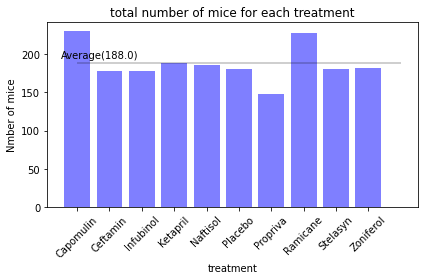

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#Selecting data for bar plot
Mouse_Regimen=Clean_main_data[{'Drug Regimen','Mouse ID'}]
#ouse_Regimen.head()

#Calculating the number of mice for each treatmnt
Mouse_Count=Mouse_Regimen.groupby('Drug Regimen')['Mouse ID'].count()

#converting to DataFrame
Mouse_Count_df=pd.DataFrame(Mouse_Count)

#Plotting the bar chart on the Screen
MiceperDrug_bar=plt.bar(Mouse_Count_df.index,Mouse_Count_df["Mouse ID"], color='b',alpha=0.5,align='center')
plt.title("total number of mice for each treatment")
plt.xlabel("treatment")
plt.xticks(rotation=45)
plt.ylabel("Nmber of mice")

#Calculating the Aveage of mice count for displaying hline
Avrage_mouse_count=Mouse_Count.mean()
plt.hlines(Avrage_mouse_count,0,len(Mouse_Count),alpha=0.25)
plt.text(-0.5, Avrage_mouse_count+10, f'Average({Avrage_mouse_count})', ha ='left', va ='center')

plt.tight_layout()


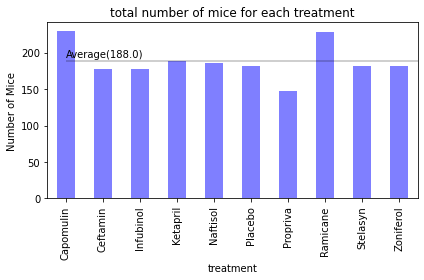

In [15]:
MiceperDrug_bar1=Mouse_Count.plot(kind='bar',color='b',alpha=0.5,align='center')
plt.hlines(Avrage_mouse_count,0,len(Mouse_Count),alpha=0.25)
plt.text(0, Avrage_mouse_count+10, f'Average({Avrage_mouse_count})', ha ='left', va ='center')
plt.ylabel("Number of Mice")
plt.xlabel("treatment")
plt.title("total number of mice for each treatment")
plt.tight_layout()

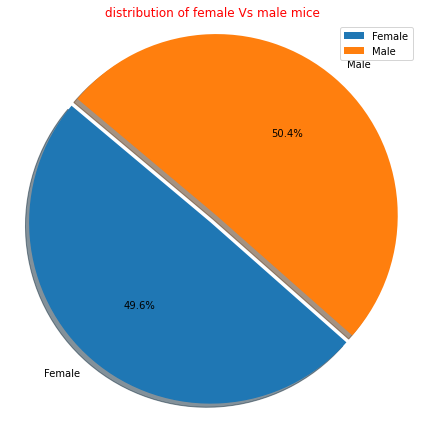

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Selecting data for bar plot
Mouse_Sex=Clean_main_data[{'Sex','Mouse ID'}]
Mouse_Sex_data=Mouse_Sex.groupby('Sex')['Mouse ID'].nunique()

Mouse_Sex_df=pd.DataFrame(Mouse_Sex_data)


plt.figure(figsize=(6,6))
Mouse_Sex_pie=plt.pie(Mouse_Sex_df['Mouse ID'],labels=Mouse_Sex_df.index, explode=(0,0.05) , autopct="%1.1f%%",shadow=True, startangle=140 )
plt.axis("equal")
plt.legend(loc='best')
plt.title('distribution of female Vs male mice',c="r")
plt.tight_layout()
#plt.savefig("pie.png")
plt.show()

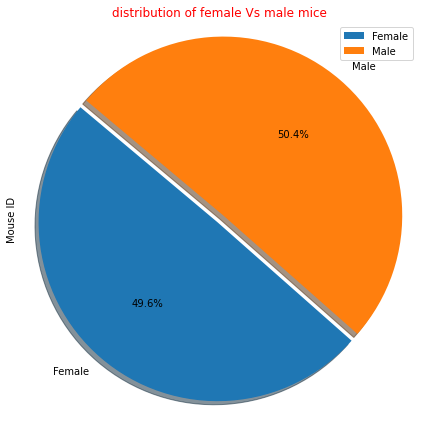

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6,6))

Mouse_Sex_pie1=Mouse_Sex_data.plot(kind='pie',y=Mouse_Sex_data.index,explode=(0,0.05) 
                                   , autopct="%1.1f%%",shadow=True, startangle=140 ,title='distribution of female Vs male mice')
plt.axis("equal")
plt.legend(loc='best')
plt.tight_layout()
plt.title('distribution of female Vs male mice',c="r")
plt.savefig("pie2.png")
plt.show()

## Quartiles, Outliers and Boxplots


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Selected_data=Clean_main_data[{'Drug Regimen','Mouse ID','Timepoint','Tumor Volume (mm3)'}]
Selected_data=Selected_data.copy()

#Sorted_Selected_data=Selected_data.sort_values(["Drug Regimen","Mouse ID", "Timepoint"])
Sorted_groupedby=Selected_data.groupby(["Drug Regimen","Mouse ID"]).last()

#Sorted_groupedby

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Main_mouse_df=pd.merge(mouse_metadata,Sorted_groupedby,on = ['Mouse ID','Drug Regimen'], how ="outer")

Main_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Timepoint
0,k403,Ramicane,Male,21,16,22.050126,45.0
1,s185,Capomulin,Female,3,17,23.343598,45.0
2,x401,Capomulin,Female,16,15,28.484033,45.0
3,m601,Capomulin,Male,22,17,28.430964,45.0
4,g791,Ramicane,Male,11,16,29.128472,45.0
...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,45.934712,5.0
245,z435,Propriva,Female,12,26,48.710661,10.0
246,z581,Infubinol,Female,24,25,62.754451,45.0
247,z795,Naftisol,Female,13,29,65.741070,45.0


In [84]:
# Put treatments into a list for for loop (and later for plot labels)
List_Treatment=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data=[]
Outliers=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    

for List in List_Treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Last_Treatment = Main_mouse_df.loc[Main_mouse_df['Drug Regimen']==List,'Tumor Volume (mm3)',]
    # add subset
    tumor_data.append(Last_Treatment)
 
    #Calculating IQR and quantitatively determine
    
    quartiles = round(Last_Treatment.quantile([.25,.5,.75]),2)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
    
    print(List+":")
    print(f"The lower quartile of the Last Tumor Volume for {List} Treatment is: {Fore.BLUE}     {lowerq} {Style.RESET_ALL}")
    print(f"The upper quartile of the Last Tumor Volume for {List} Treatment is: {Fore.BLUE}     {upperq}  {Style.RESET_ALL}")
    print(f"The interquartile range of the Last Tumor Volume for {List} Treatment is:{Fore.BLUE} {iqr}   {Style.RESET_ALL}")
    print(f"The the median of the Last Tumor Volume for {List} Treatment is:          {Fore.BLUE}{quartiles[0.5]} {Style.RESET_ALL}")
    # Determine outliers using upper and lower bounds

    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    print(f"Values below ' {lower_bound} ' for {List} Treatment could be outliers.")
    print(f"Values above ' {upper_bound} ' for {List} Treatment could be outliers.\n") 
    
    Outliers = Main_mouse_df.loc[(Main_mouse_df['Drug Regimen']==List)&((lower_bound>Main_mouse_df['Tumor Volume (mm3)'])|(Main_mouse_df['Tumor Volume (mm3)']>upper_bound)),:]
#     Outliers.append(Outliers)
    if len(Outliers)>0 :
        print(f"{Fore.RED}These mice could be the outliers of the {List} Treatment : ")
        print(Outliers.loc[:,['Mouse ID','Drug Regimen','Tumor Volume (mm3)','Age_months','Timepoint']])
        print(f"\n{Style.RESET_ALL}")
    else:
        print(f"{Fore.GREEN}There is no outliers in {List} Treatment : ")
        print(f"\n{Style.RESET_ALL}")


    
        
        #print(f"Mouse ID {Outliers['Mouse ID']} with the Last Tumor Volumeof {Outliers['Tumor Volume (mm3)']}\n")



    

Capomulin:
The lower quartile of the Last Tumor Volume for Capomulin Treatment is:      32.38 
The upper quartile of the Last Tumor Volume for Capomulin Treatment is:      40.16  
The interquartile range of the Last Tumor Volume for Capomulin Treatment is: 7.78   
The the median of the Last Tumor Volume for Capomulin Treatment is:          38.13 
Values below ' 20.71 ' for Capomulin Treatment could be outliers.
Values above ' 51.83 ' for Capomulin Treatment could be outliers.

There is no outliers in Capomulin Treatment : 


Ramicane:
The lower quartile of the Last Tumor Volume for Ramicane Treatment is:      31.56 
The upper quartile of the Last Tumor Volume for Ramicane Treatment is:      40.66  
The interquartile range of the Last Tumor Volume for Ramicane Treatment is: 9.1   
The the median of the Last Tumor Volume for Ramicane Treatment is:          36.56 
Values below ' 17.91 ' for Ramicane Treatment could be outliers.
Values above ' 54.31 ' for Ramicane Treatment could be outlie

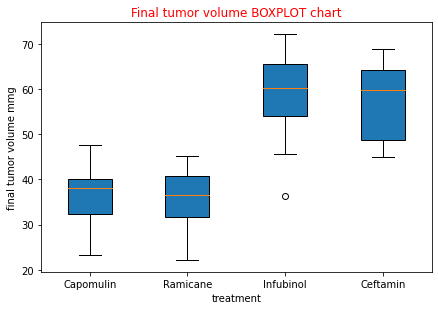

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data
fig,ax1=plt.subplots()
ax1.boxplot(tumor_data, labels=List_Treatment,patch_artist = True)
#plt.axis("equal")
#plt.legend(loc='best')
plt.tight_layout()
plt.title('Final tumor volume BOXPLOT chart',c="r")
#plt.savefig("pie2.png")
plt.ylabel("final tumor volume mmg")
plt.xlabel("treatment")

plt.show()


plt.show()

## Line and Scatter Plots

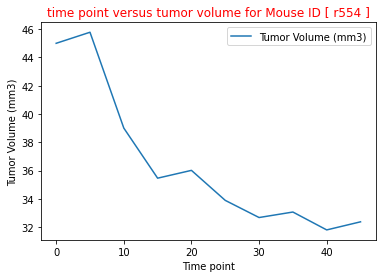

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Colecting the data of Capomulin treatment
Capomulin_Treatment = Clean_main_data.loc[Clean_main_data['Drug Regimen']=='Capomulin',:,]
Capomulin_Treatment=Capomulin_Treatment.copy()
#Capomulin_Treatment

#Seting a new index for Capomulin dara
Capomulin_Treatment=Capomulin_Treatment.reset_index()

#Selecting a random Mouse for line plot
Random_mouse= rand.choice(Capomulin_Treatment['Mouse ID'])
#Random_mouse

#Selecting the random Mouse data for line plot
Random_mouse_data = Capomulin_Treatment.loc[Capomulin_Treatment['Mouse ID']==Random_mouse,:,]
#Random_mouse_data

#Creating a line plot of time point versus tumor volume for the random Mouse treated with Capomulin 
Random_mouse_data.plot(x ='Timepoint', y='Tumor Volume (mm3)', kind = 'line')
title='time point versus tumor volume for Mouse ID [ '+str(Random_mouse + ' ]')
plt.title(title,c="r")
plt.xlabel('Time point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

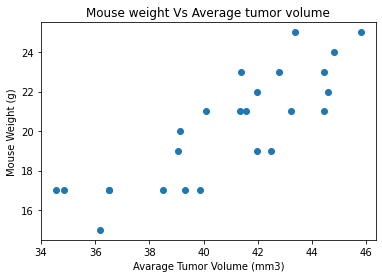

In [54]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Colecting and calculating the data of Capomulin treatment 
Weight_volume_df=Capomulin_Treatment.groupby("Mouse ID").agg({'Weight (g)':'max','Tumor Volume (mm3)':'mean'})

#Creating scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values=Weight_volume_df['Tumor Volume (mm3)']
y_values=Weight_volume_df['Weight (g)']
plt.title('Mouse weight Vs Average tumor volume')
plt.scatter(x_values,y_values)
plt.xlabel('Avarage Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.show()


## Correlation and Regression


The linear equations for mouse weight and average tumor volume is :  y = 0.74x + -10.15 

The correlation coefficient between mouse weight acid and average tumor volume is: 0.84



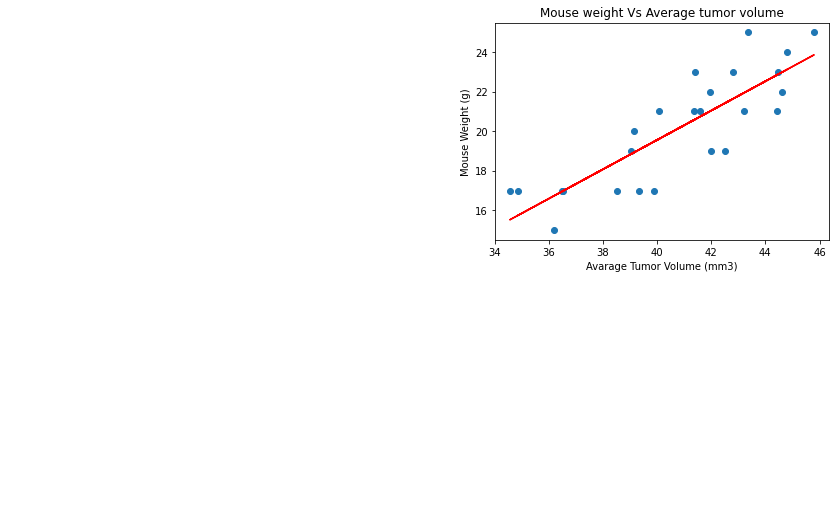

In [75]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values=Weight_volume_df['Tumor Volume (mm3)']
y_values=Weight_volume_df['Weight (g)']

# Calculating the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)[0] 

#Creating scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(x_values,y_values)
plt.xlabel('Avarage Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse weight Vs Average tumor volume')
plt.annotate(line_eq,(16,1),fontsize=50,color="red")
print(f"\nThe linear equations for mouse weight and average tumor volume is : {Fore.RED} {line_eq} {Style.RESET_ALL}\n")
print(f"The correlation coefficient between mouse weight acid and average tumor volume is: {Fore.BLUE}{round(correlation,2)}\n")

plt.show()
